
# Individual Project 
----------
#### Task:

This dataset is composed of 1100 samples with 30 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of Logistic
Regression (implemented by sklearn.linear_model.LogisticRegression) with that of
a Random Forest (implemented by sklearn.ensemble.RandomForestClassifier). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

#### Outline:
1. Exploratory Data Analysis (EDA)
2. Data Visualization
3. Clustering
4. Supervised Learning
    * Logistic Regression
    * Random Forest
5. Model Selection
6. *Bonus*: MLP and Ensemble Learning
7. Testing
8. Conclusions

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import umap.umap_ as umap
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier

np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [16]:
df = pd.read_csv('/Users/filipporonzino/mathematical-modelling-in-ml/mathematical-modelling-in-ml/data/mldata_0003191788.csv')

In [17]:
df

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,1,0.186841,-2.744690,-0.116704,-0.602364,-1.641072,2.313851,0.170587,1.125775,...,-6.373998,0.709352,-0.058280,-0.247173,0.380575,6.038908,2.977625,-0.110516,7.712829,-0.883559
1,1,0,-0.140899,-0.940808,0.319645,3.037467,2.500847,2.470812,0.185487,2.616694,...,-0.923659,-2.015370,1.692468,0.724315,0.978863,0.703763,-0.800900,0.101999,0.614388,2.586955
2,2,1,-1.173064,-0.114253,0.841768,1.291894,2.255292,-1.211251,0.155832,-0.713129,...,2.020354,-0.996525,-0.370041,0.430683,-0.660852,-2.146161,0.250038,-1.456109,-2.890239,-1.718367
3,3,0,0.295393,3.583453,-0.586350,-0.377401,3.123070,-1.129148,0.035295,0.739957,...,-5.041228,1.271944,0.386650,0.063930,0.819503,-1.709886,0.893065,-0.453312,0.155210,-4.222819
4,4,0,-0.157495,-3.544878,-3.704118,-3.914768,3.285951,2.204027,0.173815,0.587712,...,3.347483,-1.518625,-1.176892,0.661577,0.152321,-0.822095,0.775936,1.406577,3.439471,-4.224369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,1,-1.248654,-2.638169,-0.341790,-3.235112,-1.061706,5.592094,0.768235,0.865910,...,0.781173,-1.556207,0.394023,-0.697240,-0.029789,-0.646155,-0.572358,0.416792,-4.918894,0.274711
1096,1096,0,1.306852,-2.095241,-1.794960,-1.595448,0.752237,1.084699,0.872910,0.119845,...,1.800205,-0.674627,-1.272363,0.310472,0.912195,-0.013783,0.583534,0.490962,2.843907,-3.774760
1097,1097,1,-0.101527,-0.282872,2.278711,4.529451,0.636032,-3.292582,0.637552,-0.666807,...,-0.200464,-2.097702,-0.038374,0.367508,-1.253793,-0.960783,0.616830,0.984960,-1.101286,-1.065255
1098,1098,1,-1.701515,-3.018610,0.706628,4.117148,5.242728,2.188487,1.027309,0.093118,...,-2.350287,5.330351,-0.560883,-0.806675,0.290558,0.496878,0.461117,0.345153,0.100160,0.769789


It is clear that the dataset is composed of 1100 samples with 30 features each. Let us inspect if the column Unnamed: 0 is the sample id and, if so, if we can drop it.

In [18]:
print("Number of unique elements in the ID column:", len(df["Unnamed: 0"].unique()))
print("Missing values in ID column:", df["Unnamed: 0"].isna().sum())

Number of unique elements in the ID column: 1100
Missing values in ID column: 0


Hence we do not have any problem in deleting the first column.

In [19]:
df = df.drop(columns=["Unnamed: 0"])
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,0.186841,-2.744690,-0.116704,-0.602364,-1.641072,2.313851,0.170587,1.125775,-15.196770,...,-6.373998,0.709352,-0.058280,-0.247173,0.380575,6.038908,2.977625,-0.110516,7.712829,-0.883559
1,0,-0.140899,-0.940808,0.319645,3.037467,2.500847,2.470812,0.185487,2.616694,-2.061065,...,-0.923659,-2.015370,1.692468,0.724315,0.978863,0.703763,-0.800900,0.101999,0.614388,2.586955
2,1,-1.173064,-0.114253,0.841768,1.291894,2.255292,-1.211251,0.155832,-0.713129,8.216570,...,2.020354,-0.996525,-0.370041,0.430683,-0.660852,-2.146161,0.250038,-1.456109,-2.890239,-1.718367
3,0,0.295393,3.583453,-0.586350,-0.377401,3.123070,-1.129148,0.035295,0.739957,-0.644795,...,-5.041228,1.271944,0.386650,0.063930,0.819503,-1.709886,0.893065,-0.453312,0.155210,-4.222819
4,0,-0.157495,-3.544878,-3.704118,-3.914768,3.285951,2.204027,0.173815,0.587712,-7.450599,...,3.347483,-1.518625,-1.176892,0.661577,0.152321,-0.822095,0.775936,1.406577,3.439471,-4.224369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,-1.248654,-2.638169,-0.341790,-3.235112,-1.061706,5.592094,0.768235,0.865910,-5.357165,...,0.781173,-1.556207,0.394023,-0.697240,-0.029789,-0.646155,-0.572358,0.416792,-4.918894,0.274711
1096,0,1.306852,-2.095241,-1.794960,-1.595448,0.752237,1.084699,0.872910,0.119845,-8.449998,...,1.800205,-0.674627,-1.272363,0.310472,0.912195,-0.013783,0.583534,0.490962,2.843907,-3.774760
1097,1,-0.101527,-0.282872,2.278711,4.529451,0.636032,-3.292582,0.637552,-0.666807,8.033673,...,-0.200464,-2.097702,-0.038374,0.367508,-1.253793,-0.960783,0.616830,0.984960,-1.101286,-1.065255
1098,1,-1.701515,-3.018610,0.706628,4.117148,5.242728,2.188487,1.027309,0.093118,2.060452,...,-2.350287,5.330351,-0.560883,-0.806675,0.290558,0.496878,0.461117,0.345153,0.100160,0.769789


We quickly inspect the data types and any missing values in the dataset.

In [22]:
print("Data types of the columns:", df.dtypes.value_counts())
print("Number of missing values in the dataset:", df.isna().sum().sum())

Data types of the columns: float64    30
int64       1
Name: count, dtype: int64
Number of missing values in the dataset: 0


Great! All values of features are numeric and moreover we do not have missing values.

Now let us inspect the labels, we expect to have 2 possible values as stated in the assignment.

In [23]:
df["label"].unique()

array([1, 0])

Let us see if they are balanced.

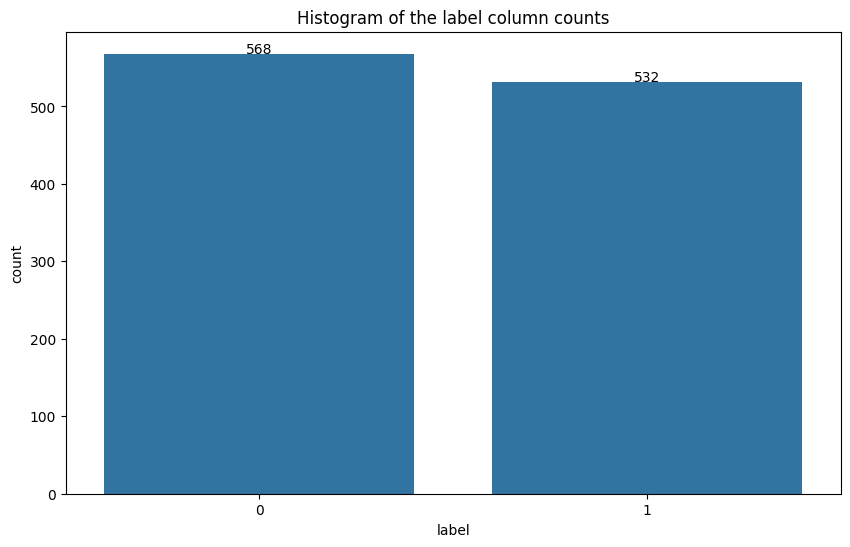

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=df)
plt.title("Histogram of the label column counts")
for i in range(len(df["label"].unique())):
    plt.text(i, df["label"].value_counts().values[i], df["label"].value_counts().values[i], ha = 'center')
plt.show()

The labels are balanced, which is good for the classification task. Now let us inspect the features instead.

In [28]:
df_features = df.drop(columns=["label"])
df_features.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.060647,-0.366158,1.200502,-0.462171,0.538262,1.049753,0.095785,0.136334,-1.916849,0.046056,...,0.066003,-0.473698,0.054317,0.120844,0.082652,-0.420596,0.155161,0.142598,0.633804,0.203087
std,1.004725,2.499004,2.352068,2.500206,2.269113,2.061337,0.973378,0.995805,5.775382,0.983710,...,2.574681,2.178810,0.947827,1.001644,1.036514,2.405899,0.983242,0.991322,2.364771,2.909591
min,-3.198872,-7.797190,-6.391251,-8.485804,-6.759114,-6.385449,-3.134674,-2.998161,-20.359685,-3.493763,...,-8.186496,-7.355286,-2.971199,-3.096381,-3.016178,-7.246709,-3.233028,-2.939875,-7.126700,-9.279328
25%,-0.602991,-2.055746,-0.379523,-2.121274,-0.972832,-0.282908,-0.558524,-0.517616,-5.965297,-0.610249,...,-1.587301,-1.907630,-0.579704,-0.571916,-0.591526,-2.053991,-0.476474,-0.525719,-0.918847,-1.723850
50%,0.030977,-0.507137,1.204412,-0.519821,0.489950,1.035311,0.066979,0.103702,-1.838725,0.029674,...,0.140228,-0.609788,0.029868,0.095667,0.095901,-0.497600,0.135359,0.136409,0.715291,0.232109
75%,0.735890,1.246236,2.757944,1.241079,1.970690,2.324991,0.754281,0.816023,1.865396,0.708567,...,2.012621,0.915316,0.679729,0.792304,0.783633,1.140728,0.853275,0.780351,2.234327,2.173947
max,3.331658,8.031976,8.863005,8.424175,8.239746,9.618153,3.865937,3.487003,18.690860,3.454902,...,7.538498,7.355394,2.833630,3.672508,3.464763,10.017235,2.977625,3.754797,9.229670,10.465231


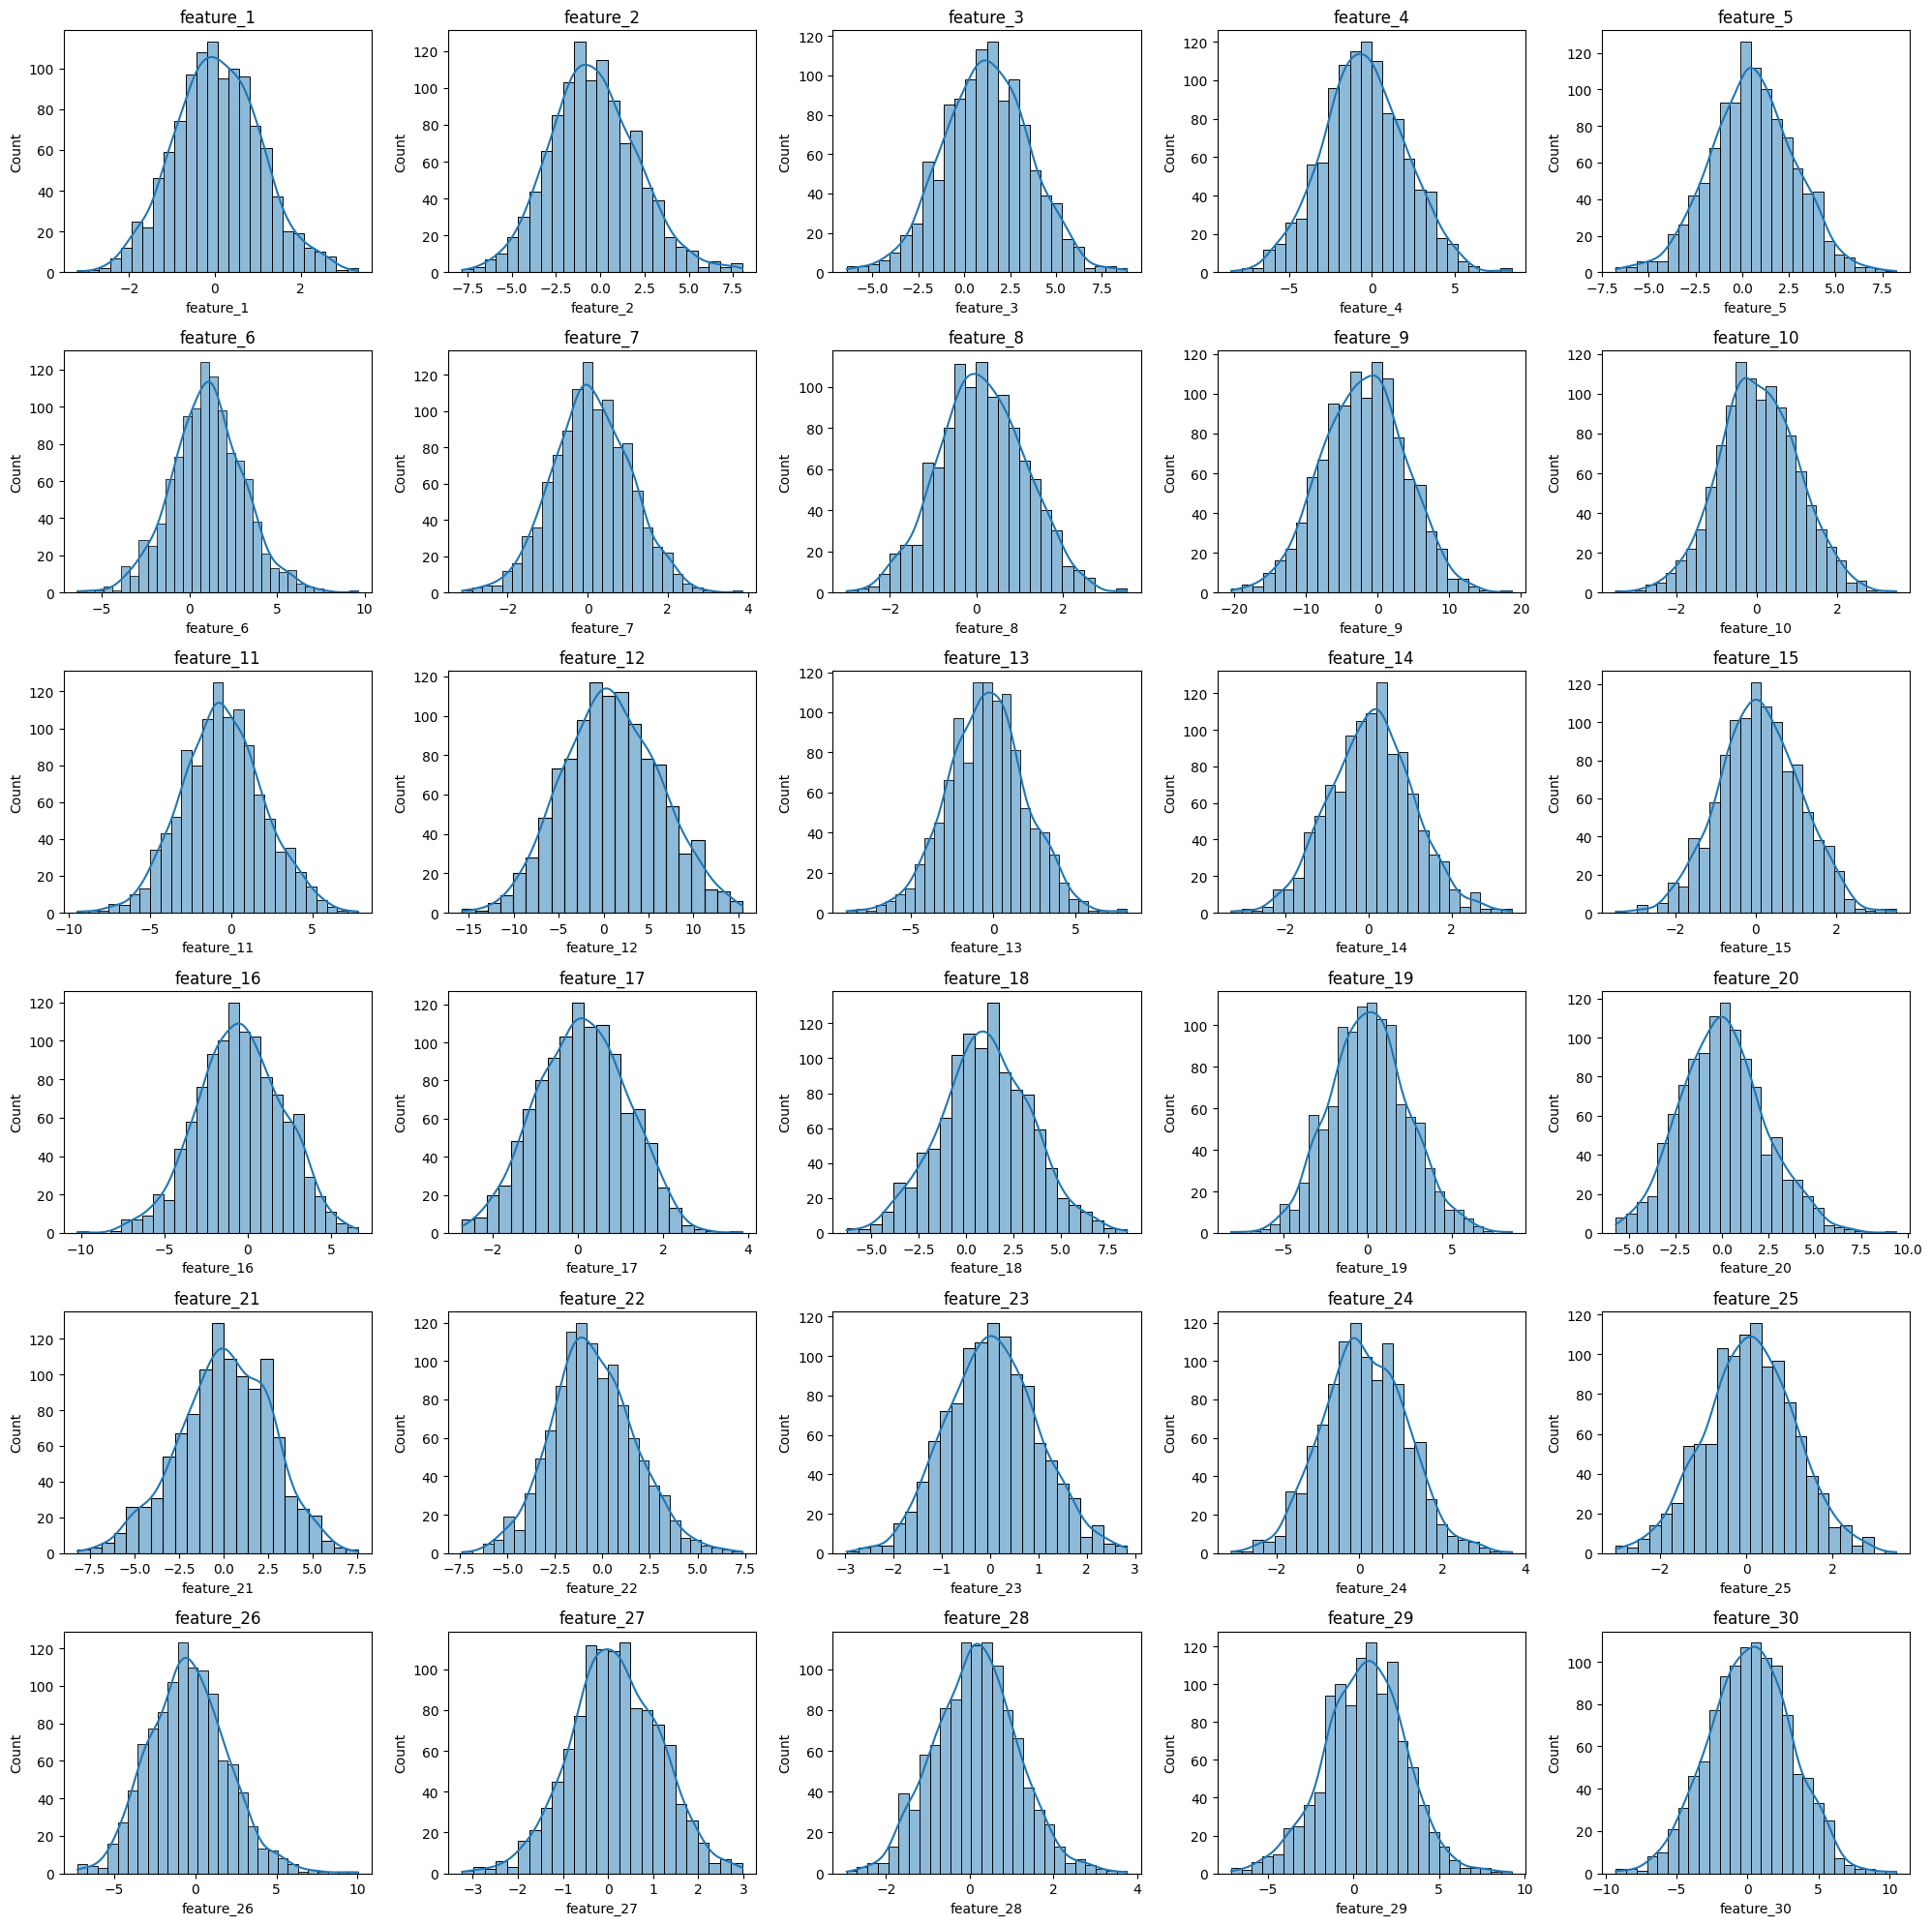

In [36]:
# Plot the distribution of the features
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_features.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_features[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


Plots clearly shows that the features are normally distributed. First let's have a look at kurtosis and skewnees and then proceed in proving normality statistically with the Shapiro-Wilk test; we use it instead of Kolmogorov-Smirnov test because it is more powerful given the small sample size not too large.

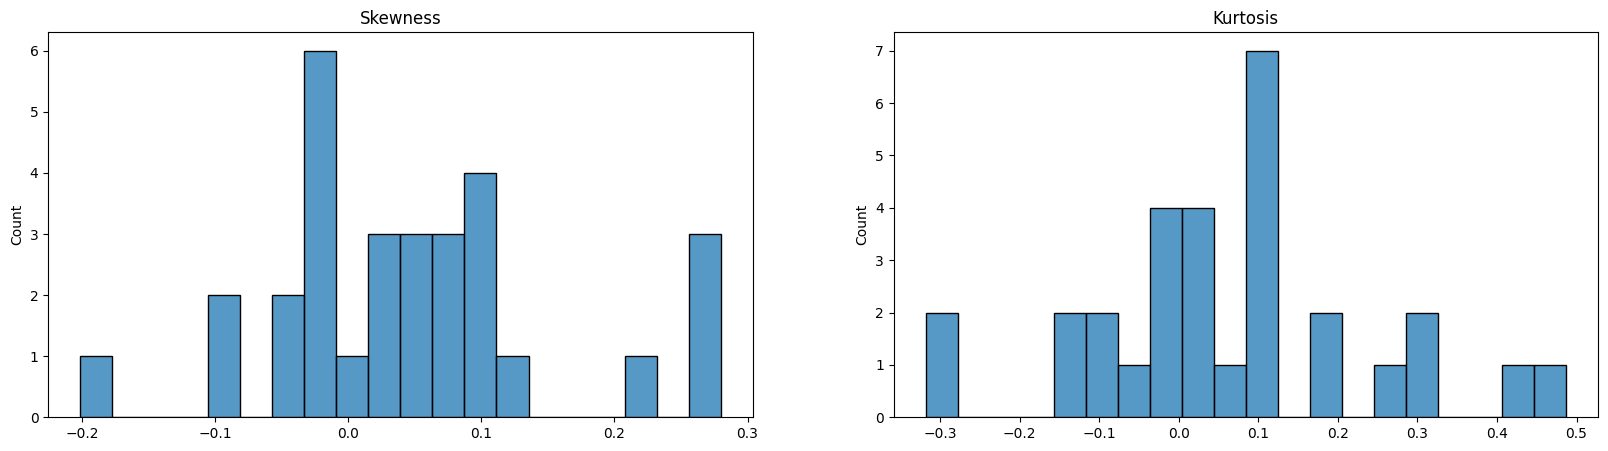

In [61]:
skewness = df_features.skew()
kurtosis = df_features.kurtosis()
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(skewness, bins=20)
plt.title("Skewness")
plt.subplot(1, 2, 2)
sns.histplot(kurtosis, bins=20)
plt.title("Kurtosis")
plt.show()

In [47]:
# Prove normality of the features with shapiro test
from scipy.stats import shapiro

def test_normality_per_feature(data):
    non_normal_count = 0
    for column in data.columns:
        p_value = shapiro(data[column])[1]
        if p_value < 0.05:
            non_normal_count += 1
    if data.shape[1] == non_normal_count:
        print("All features have non-normal distribution")
    else:
        print("Not all features have non-normal distribution")
        print("Number of features with non-normal distribution:", non_normal_count)
    return non_normal_count

non_normal_count = test_normality_per_feature(df_features)

Not all features have non-normal distribution
Number of features with non-normal distribution: 6


And indeed most of the features are normally distributed with a significance level of 0.05. Now let's have a look at the correlation between the features.

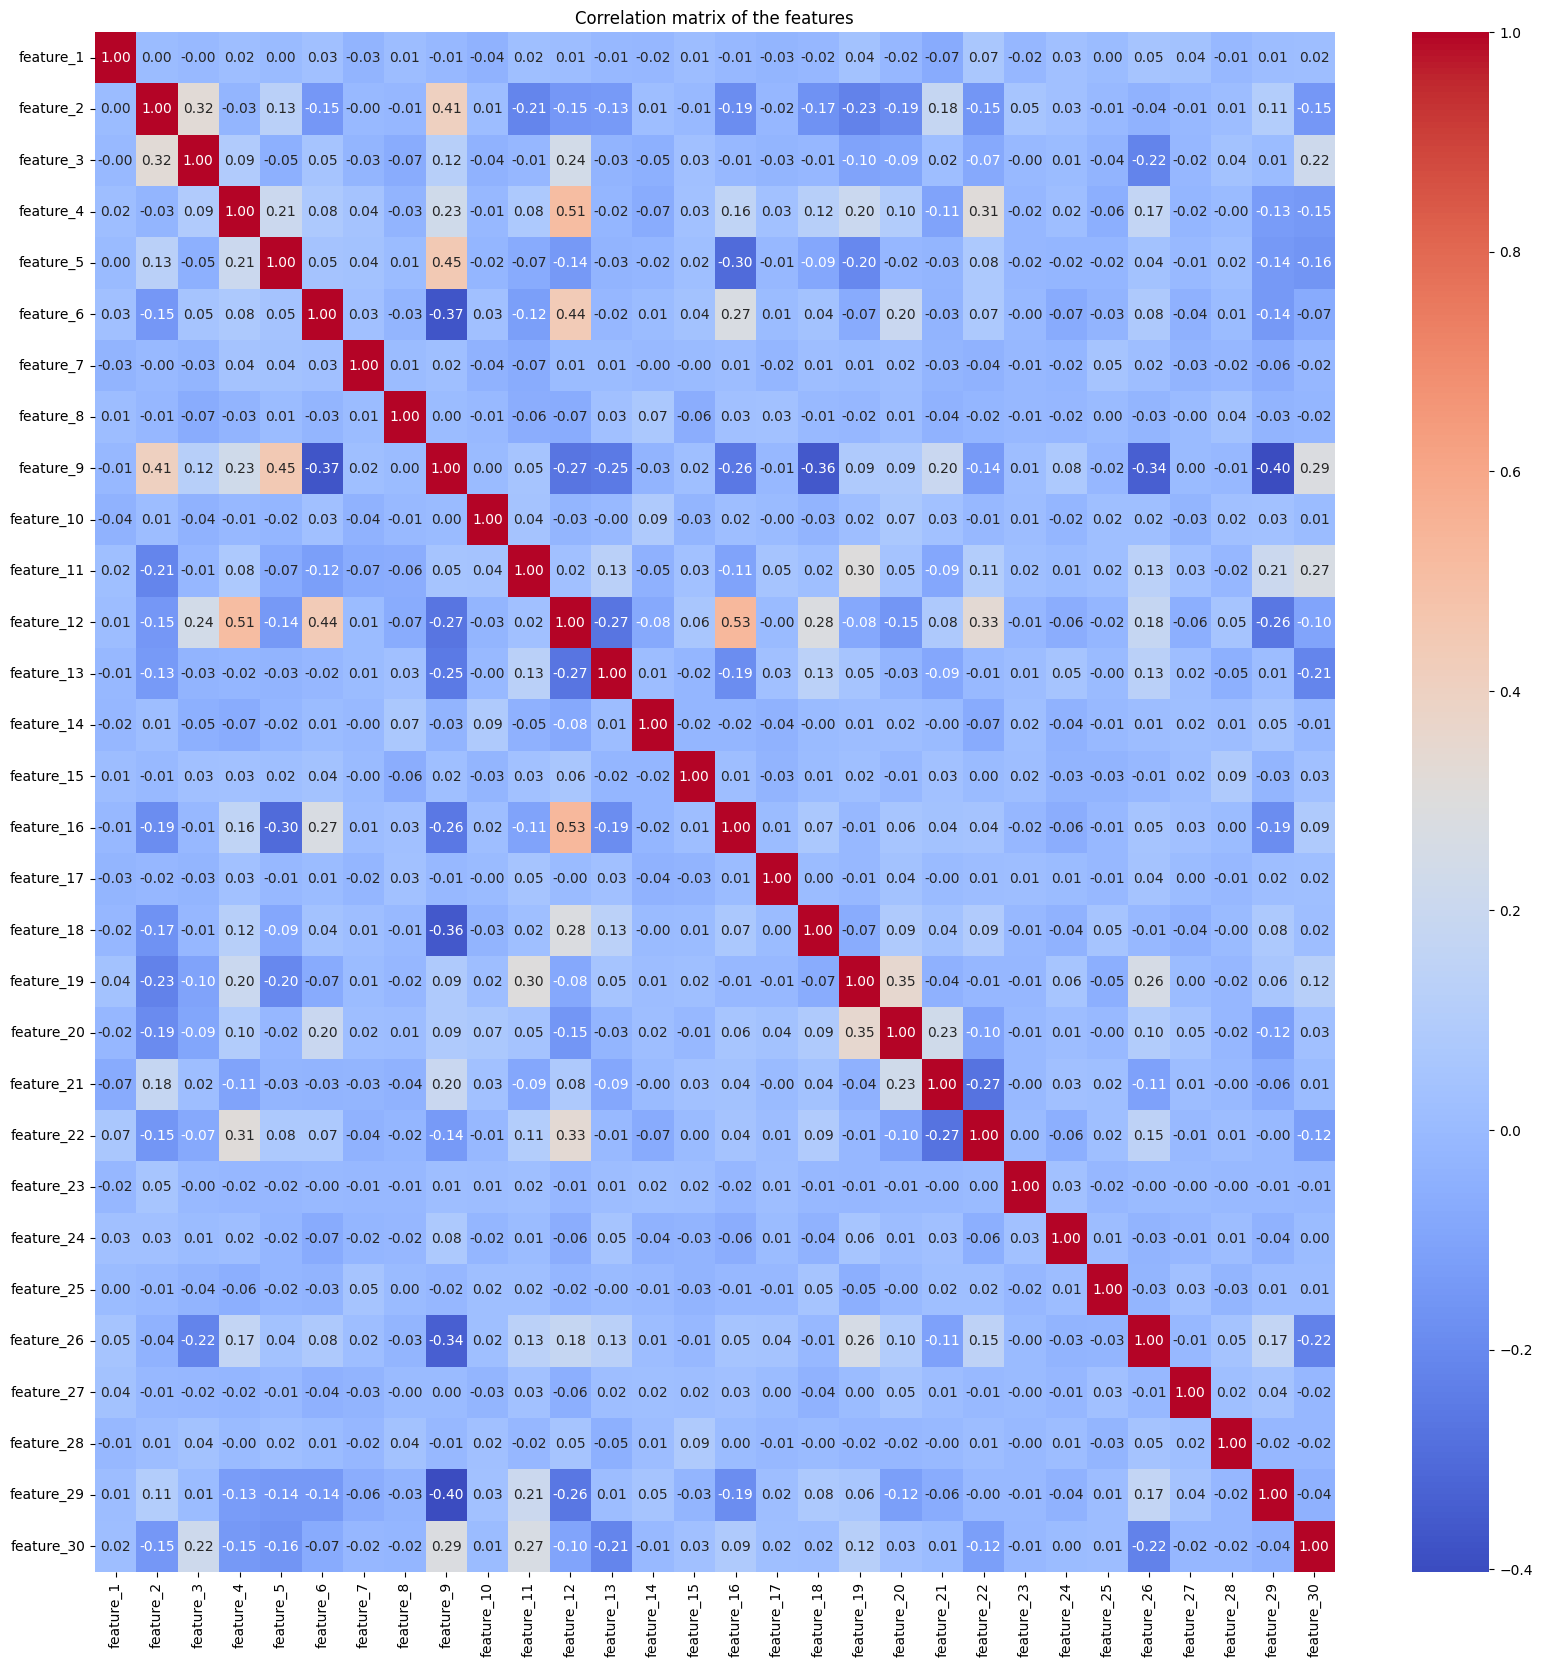

In [48]:
corr = df_features.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix of the features")
plt.show()

It is then evident that most of the features are not correlated or lowly correlated, which is good for the classification task.
Let us inspect outliers with first boxplots and then IQR method.

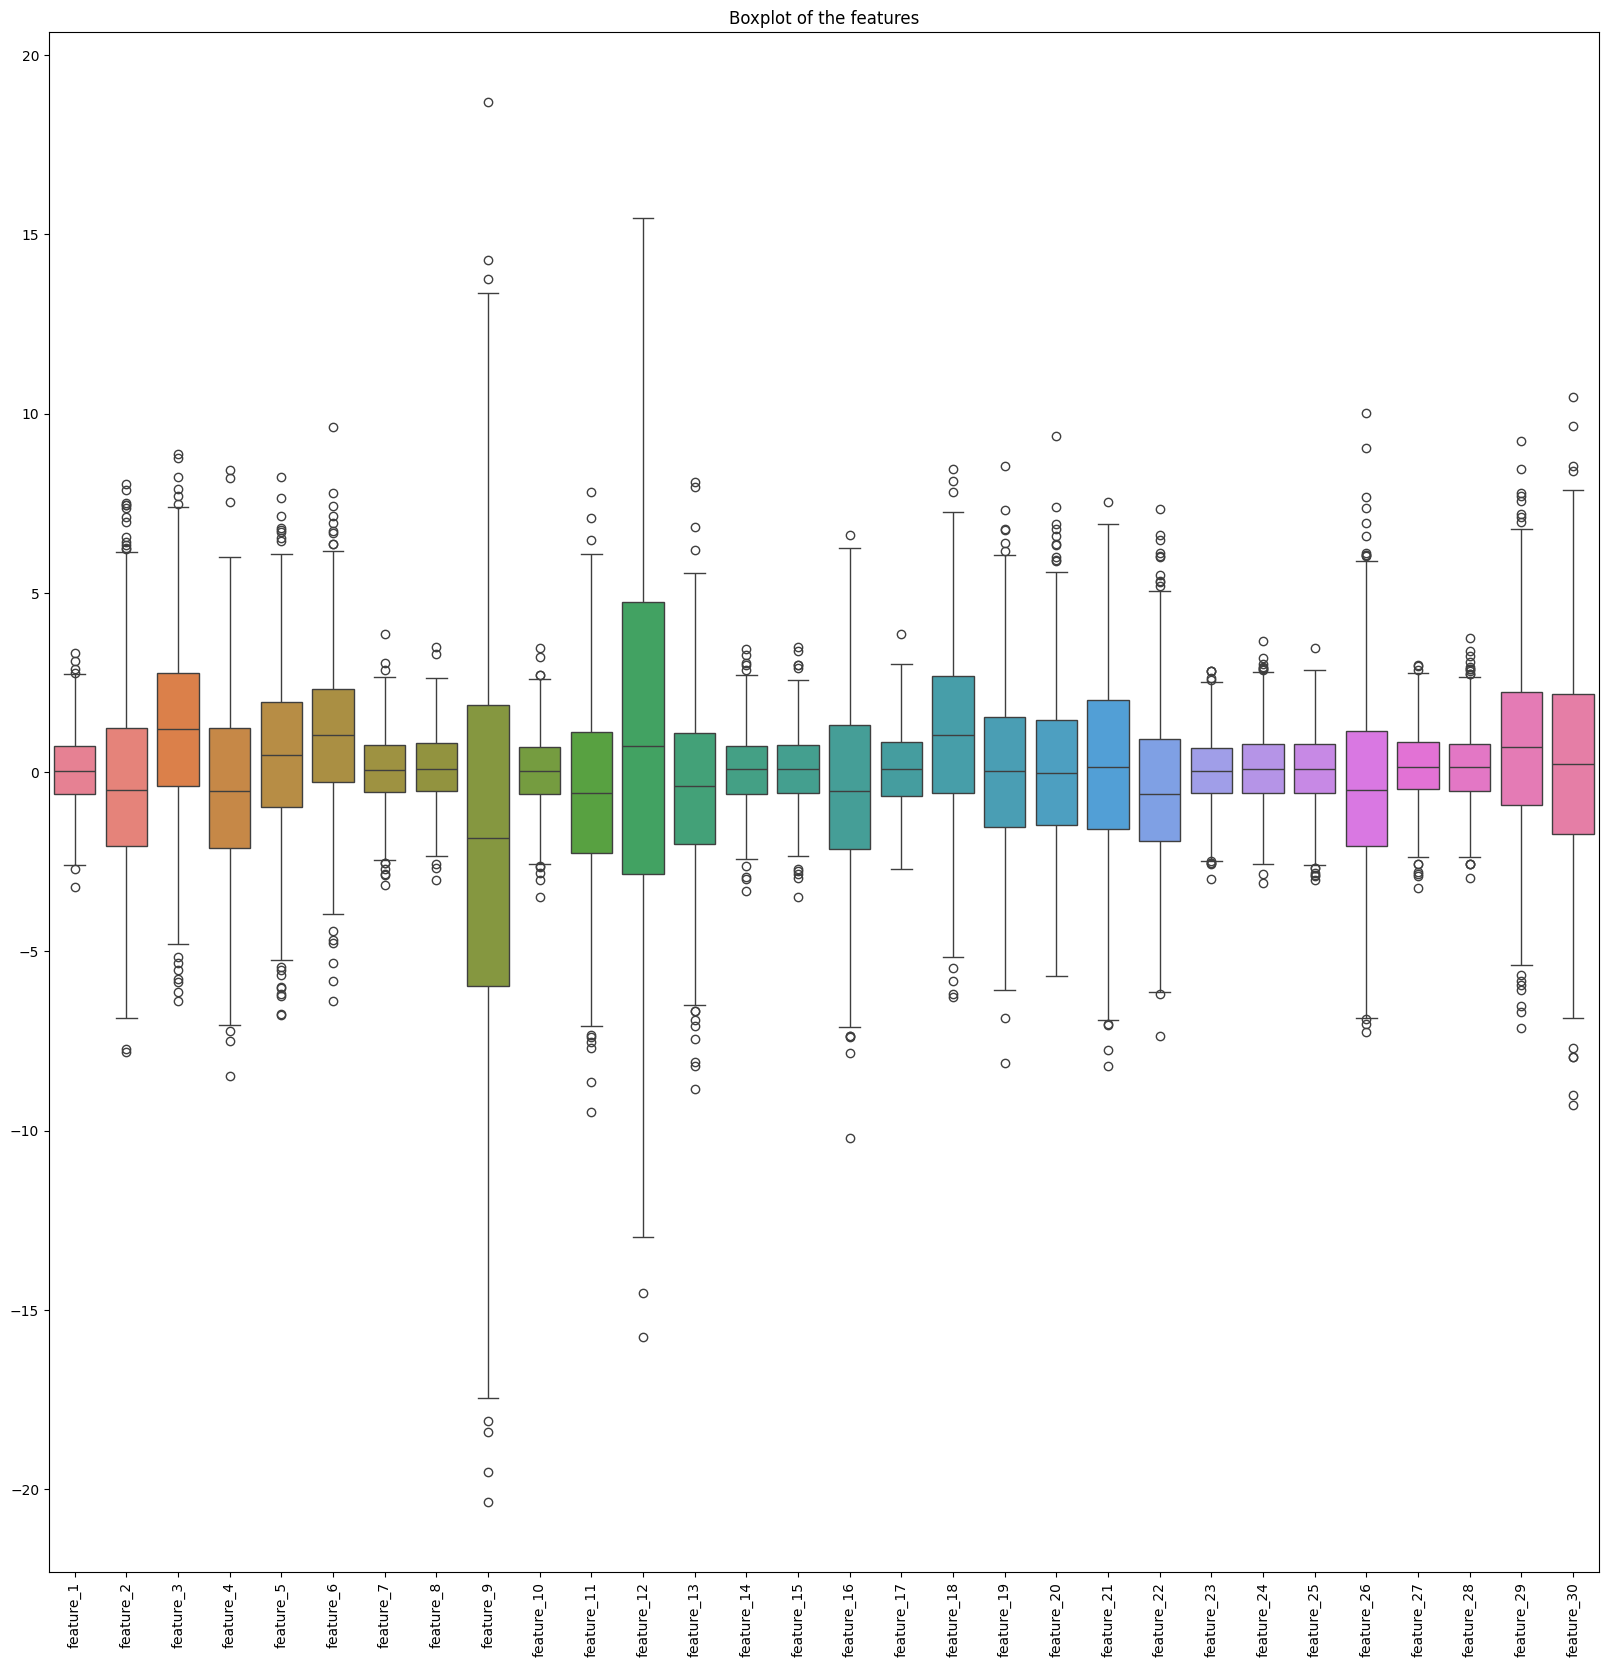

In [52]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df_features)
plt.xticks(rotation=90)
plt.title("Boxplot of the features")
plt.show()

As we already proved noramlity of most features, it is also clear from the boxplot the symmetry of the distributions. From a first look there are just a few outliers, but let us see them with the IQR proximity rule.

In [66]:
total_elements = df_features.shape[0] * df_features.shape[1]
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_features < (Q1 - 1.5 * IQR)) | (df_features > (Q3 + 1.5 * IQR))
# Print outliers fora each column
print("Number of outliers in the DataFrame:", outliers.sum())
# Print outliers percentage
outliers_percentage = (outliers.sum().sum() / total_elements) * 100
print("Outliers Percentage:","{:.2f}%".format(outliers_percentage))

Number of outliers in the DataFrame: feature_1      6
feature_2     15
feature_3     13
feature_4      6
feature_5     17
feature_6     15
feature_7      9
feature_8      5
feature_9      7
feature_10     9
feature_11     9
feature_12     2
feature_13    12
feature_14     9
feature_15    10
feature_16     6
feature_17     1
feature_18     7
feature_19     8
feature_20    10
feature_21     5
feature_22    12
feature_23    10
feature_24     9
feature_25     7
feature_26    13
feature_27     9
feature_28    14
feature_29    15
feature_30     9
dtype: int64
Outliers Percentage: 0.85%


As expexted, just few datapoints are considered outliers for each features. A possible strategy is to remove them, but we will keep them for now considering the fact that the dataset is randomly generated. 

In real-world scenarios, extreme values are often part of the natural distribution and can provide valuable information about the underlying process, therefore giving lots of information for the classification task.


## Data visualization

Now that we have gain some insights about the dataset, let us proceed in visualizing the data. We will use PCA to reduce the dimensionality of the dataset and then plot the data in 3D.

In [71]:
df_scaled = StandardScaler().fit_transform(df_features)
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

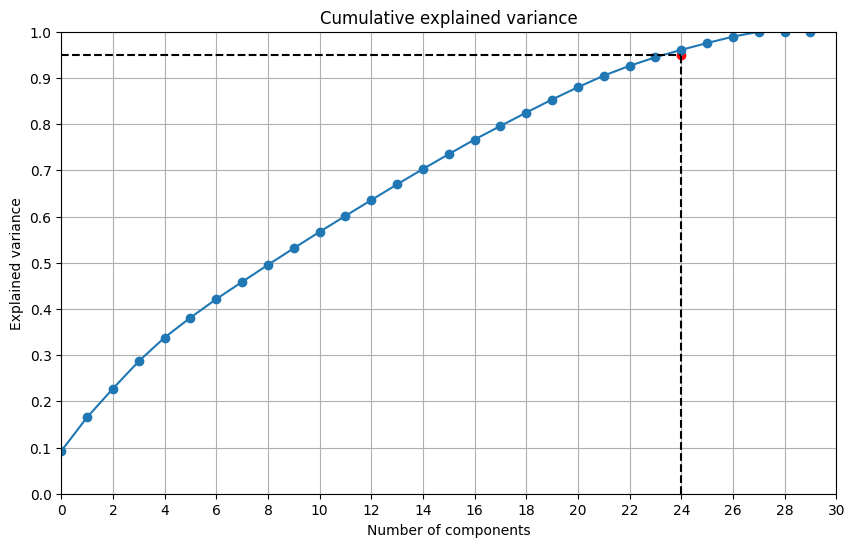

In [96]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_ticks = int(np.ceil(len(cumsum) / 2))

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))  
plt.plot(cumsum, marker='o')
plt.title("Cumulative explained variance")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.xticks(np.arange(0, len(cumsum) + 1, 2))  
plt.xlim(0, len(cumsum)) 
plt.ylim(0, 1)  
plt.yticks(np.arange(0, 1.1, 0.1))  
plt.grid(True)

nec_dimensions = np.argmax(cumsum >= 0.95)
# Plot the necessary dimensions
plt.scatter(nec_dimensions, 0.95, color='red')
plt.plot([nec_dimensions, nec_dimensions], [0, 0.95], linestyle='--', color='black')
plt.plot([0, nec_dimensions], [0.95, 0.95], linestyle='--', color='black')

plt.show()


In [84]:
df_pca_3d = pd.DataFrame(df_pca[:, :3], columns=["PC1", "PC2", "PC3"])
df_pca_3d["label"] = df["label"]
fig = px.scatter_3d(
    data_frame = df_pca_3d,
    x = "PC1",
    y = "PC2",
    z = "PC3",
    title="3-dimensional representation of the data with PCA",
    color = "label"
)
fig.show()

In [102]:
umap_model = umap.UMAP(n_components=3, n_neighbors=20)
df_umap = umap_model.fit_transform(df_scaled)

df_umap_3d = pd.DataFrame(df_umap, columns=["UMAP1", "UMAP2", "UMAP3"])
df_umap_3d["label"] = df["label"]
fig = px.scatter_3d(
    data_frame = df_umap_3d,
    x = "UMAP1",
    y = "UMAP2",
    z = "UMAP3",
    title="3-dimensional representation of the data with UMAP",
    color = "label"
)
fig.show()

## Clustering

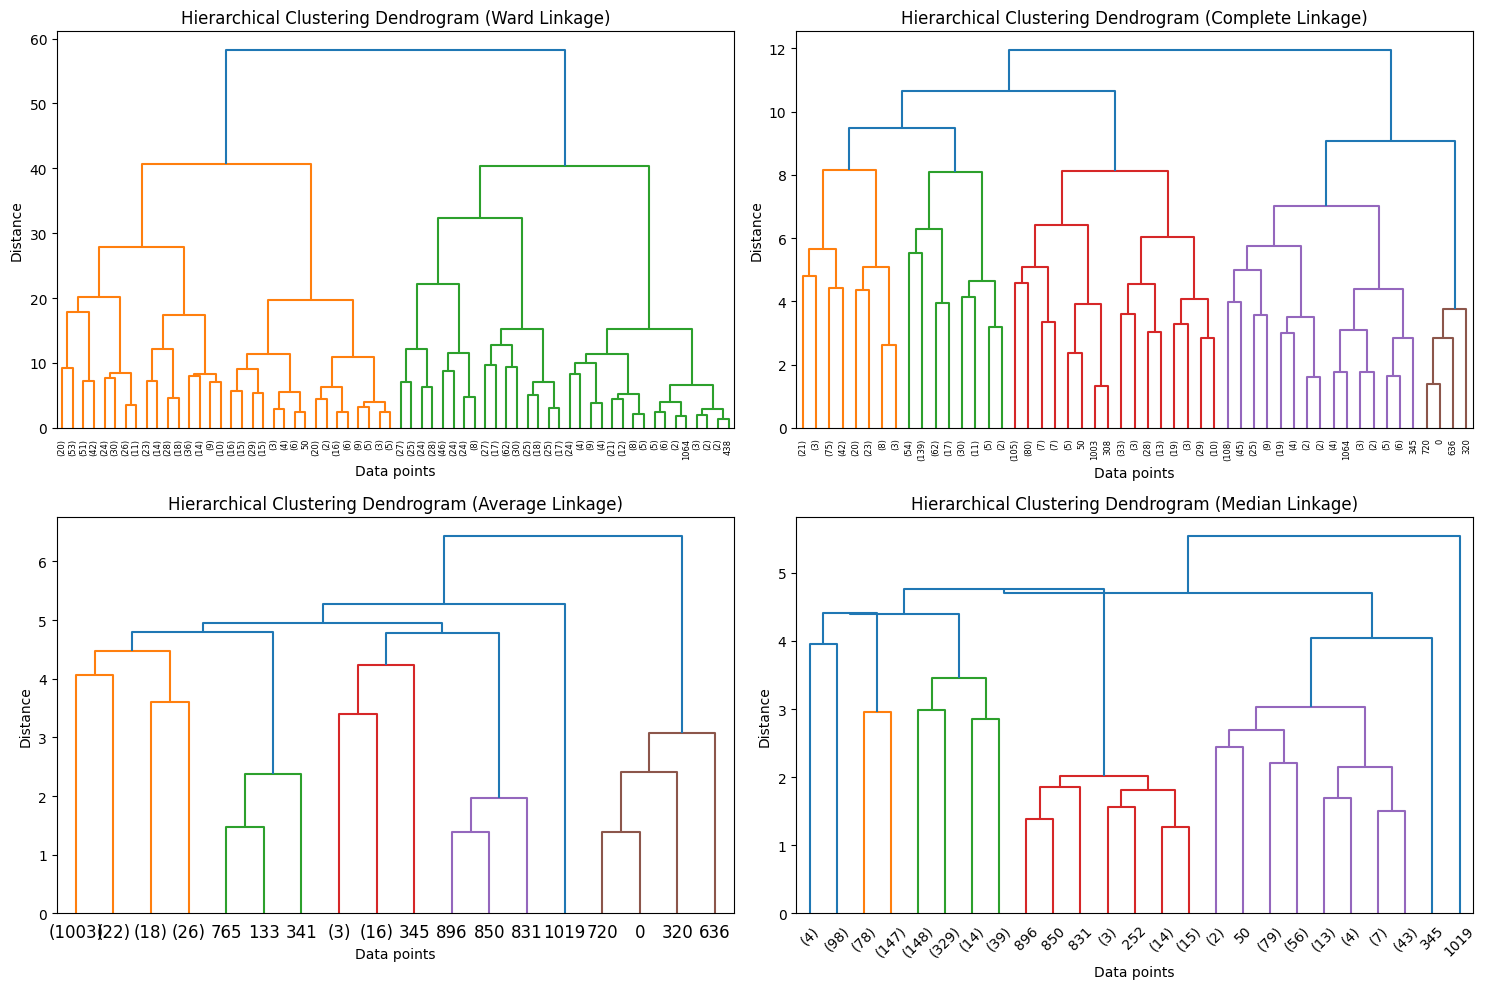

In [113]:
methods = ['ward', 'complete', 'average', 'median']

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    linked = linkage(pca_result, method=method)
    dendrogram(linked, distance_sort='descending', truncate_mode='level', p=5)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data points')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Supervised Learning

Proportions in the train and test set will roughly match those in the original dataset.

In [141]:
labels = df["label"]
X_train, X_test, y_train, y_test = train_test_split(df_features, labels, test_size=0.2, stratify=df["label"], random_state=42)

In [143]:
print("Proportions in y_train:", y_train.value_counts(normalize=True))
print("Proportions in y_test:", y_test.value_counts(normalize=True))

Proportions in y_train: label
0    0.515909
1    0.484091
Name: proportion, dtype: float64
Proportions in y_test: label
0    0.518182
1    0.481818
Name: proportion, dtype: float64


### Logistic Regression

In [146]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.8545454545454545


In [158]:
cv_score = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross validation scores:", cv_score)
print("Mean Cross validation score:", cv_score.mean())

Cross validation scores: [0.83522727 0.85795455 0.88068182 0.85795455 0.83522727]
Mean Cross validation score: 0.8534090909090908


In [192]:
param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.linspace(0.1, 1, 10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }

grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, s

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzin

[CV] END C=0.30000000000000004, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ....C=0.30000000000000004, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....C=0.30000000000000004, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.30000000000000004, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.30000000000000004, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzin

[CV] END ......................C=0.6, penalty=l2, solver=sag; total time=   0.0s
[CV] END ................C=0.6, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.7000000000000001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......................C=0.6, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.6, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.6, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.6, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=0.6, penalty=l1, solver=sag; total time=   0.0s
[CV] END .C=0.7000000000000001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.7000000000000001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.7000000000000001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.70000000000

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzin

[CV] END ......................C=0.8, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......................C=0.8, penalty=l2, solver=sag; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=1.0, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [193]:
print("Best parameters:", grid_search_logreg.best_params_)
print("Best score:", grid_search_logreg.best_score_)
print("Best estimator:", grid_search_logreg.best_estimator_)
y_pred = grid_search_logreg.best_estimator_.predict(X_test)
print("Accuracy of Logistic Regression after hyperparameter tuning:", accuracy_score(y_test, y_pred))

Best parameters: {'C': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8602272727272728
Best estimator: LogisticRegression(C=0.2, penalty='l1', random_state=42, solver='liblinear')
Accuracy of Logistic Regression after hyperparameter tuning: 0.8636363636363636


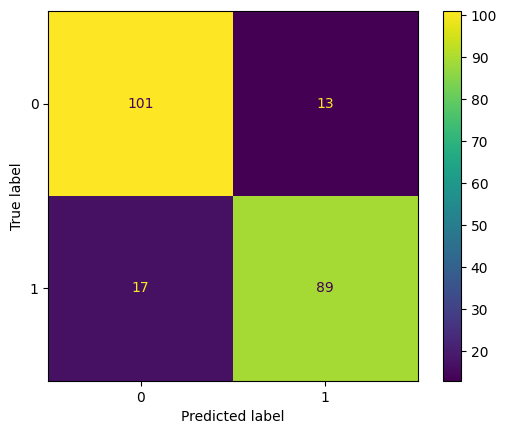

In [163]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [165]:
logreg_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", logreg_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.87      0.84      0.86       106

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



Let's analyze the results carefully:



### Random Forest

In [166]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred))

Accuracy of Random Forest: 0.8818181818181818


In [167]:
cv_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Cross validation scores:", cv_score)
print("Mean Cross validation score:", cv_score.mean())

Cross validation scores: [0.89772727 0.89772727 0.9375     0.90340909 0.85795455]
Mean Cross validation score: 0.8988636363636363


We first try to optimize one of the core parameters of the Random Forest algorithm: the number of trees in the forest. We will use a different heuristic approach to find it, to propose new methods. We plot the validation curve against the number of trees in the forest and see when the curve starts reaching a plateau. Then we will proceed in optimizing the other parameters with standard grid search.

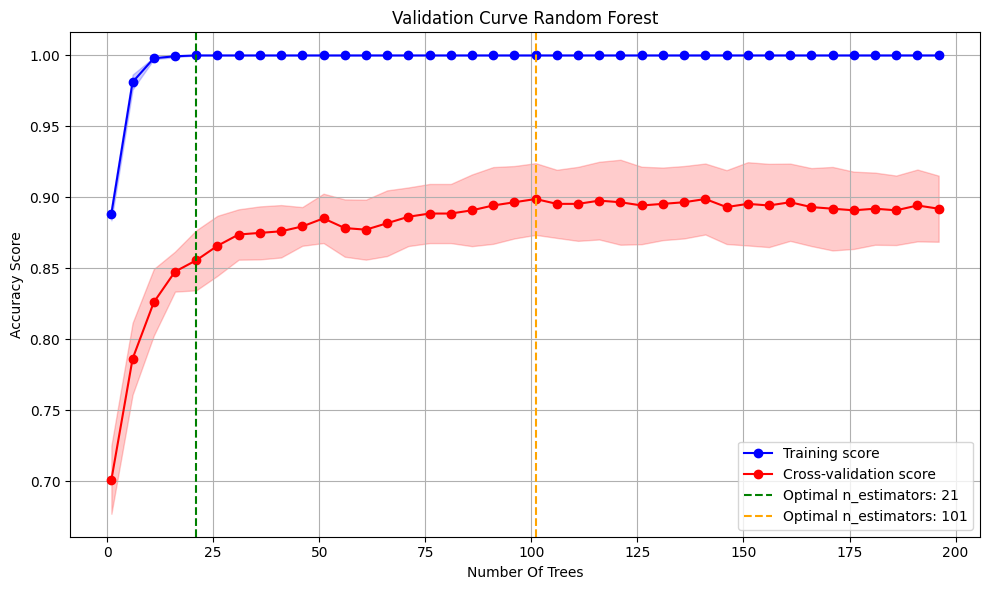

In [182]:
param_range = np.arange(1, 200, 5)
train_scores, test_scores = validation_curve(rf, X_train, y_train, param_name="n_estimators", 
                                             param_range=param_range, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker='o')
plt.plot(param_range, test_mean, label="Cross-validation score", color="red", marker='o')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

optimal_n_estimators = param_range[np.argmax(train_mean)]
plt.axvline(x=optimal_n_estimators, linestyle='--', color='green', label=f'Optimal n_estimators: {optimal_n_estimators}')
plt.axvline(x=101, linestyle='--', color='orange', label='Optimal n_estimators: 101')

plt.title("Validation Curve Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.grid(True)
plt.show()

Hence it is clear that the optimal number of trees is 101 for the cross validation scores, values above that simply do not improve the performance of the model substantially and so they are not worth the computational cost. Now we proceed in doing a grid search for the other remaining parameters.

In [190]:
param_grid = {
        'n_estimators': [101],
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
        }

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=101; total time=   0.0s
[CV] END bootstrap=True

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [101]},
             verbose=2)

In [191]:
print("Best parameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)
print("Best estimator:", grid_search_rf.best_estimator_)
y_pred = grid_search_rf.best_estimator_.predict(X_test)
print("Accuracy of Random Forest after hyperparameter tuning:", accuracy_score(y_test, y_pred))

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 101}
Best score: 0.9079545454545453
Best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=101,
                       random_state=42)
Accuracy of Random Forest after hyperparameter tuning: 0.8727272727272727


In [187]:
# Use the best estimator from the grid search
rf_best = grid_search_rf.best_estimator_
y_pred = rf_best.predict(X_test)

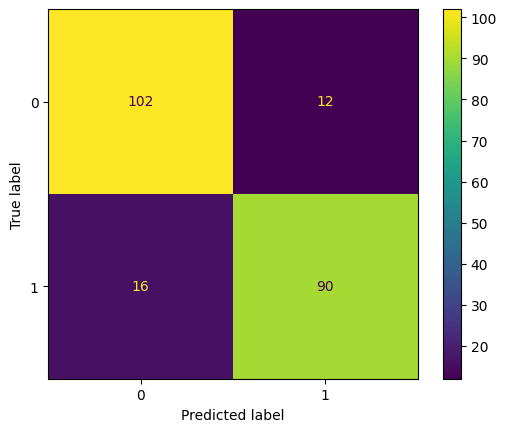

In [188]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [189]:
rf_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", rf_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       114
           1       0.88      0.85      0.87       106

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



## Model Selection

Now we consider both Logistic Regression and Random Forest with their optimal parameters found in the previous section and compare them in order to choose the best model for this dataset.

In [199]:
rf_best = grid_search_rf.best_estimator_
logreg_best = grid_search_logreg.best_estimator_

rf_scores = cross_val_score(rf_best, X_train, y_train, cv=5)
logreg_scores = cross_val_score(logreg_best, X_train, y_train, cv=5)

In [200]:
from scipy.stats import ttest_ind

# Perform t-test
t_statistic, p_value = ttest_ind(logreg_scores, rf_scores)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("The difference in performance between LogReg and RF is statistically significant.")
else:
    print("The difference in performance between LogReg and RF is not statistically significant.")


t-statistic: -2.4878652865881774
p-value: 0.03764727782381028
The difference in performance between LogReg and RF is statistically significant.


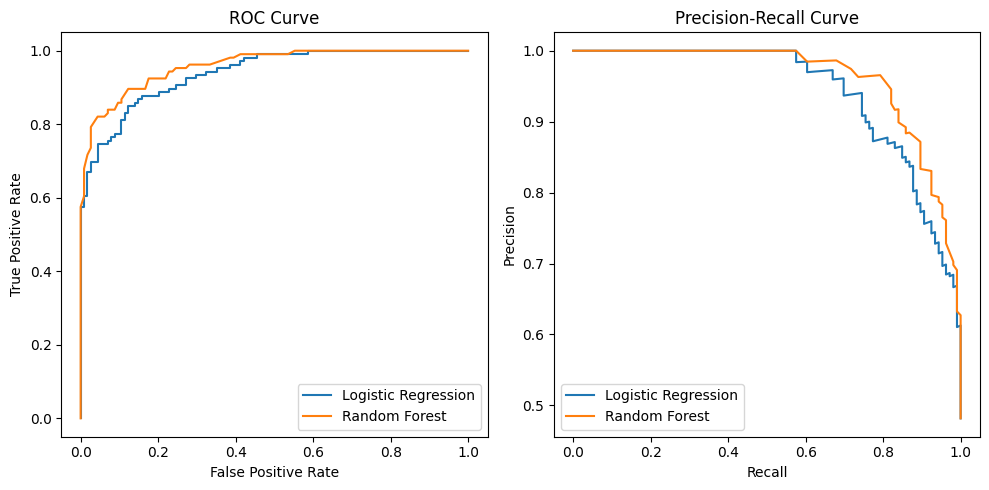

In [203]:
# Logistic Regression ROC Curve
logreg_probs = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)

# Random Forest ROC Curve
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Precision-Recall Curve
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg_probs)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

## *Bonus*: MLP and Ensemble Learning

We will now try to use a popular algorithm for classification tasks: XGBoost. We will use the same procedure as before to optimize the parameters and then compare the results with the previous models. Additionally, we will try to use ensemble learning to combine the models and see if we can improve the performance.

In [214]:
# Multilaer Perceptron Classifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Accuracy of MLP:", accuracy_score(y_test, y_pred))

Accuracy of MLP: 0.9363636363636364


In [215]:
# cross validation
cv_score = cross_val_score(mlp, X_train, y_train, cv=5)
print("Cross validation scores:", cv_score)
print("Mean Cross validation score:", cv_score.mean())

Cross validation scores: [0.90340909 0.88068182 0.93181818 0.9375     0.94886364]
Mean Cross validation score: 0.9204545454545455


In [217]:
# Tuning hyperparameters
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (50, 50, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# random search
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=i

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; tot

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50, 

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam;

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lb

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=const

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solv

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV]

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.1s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.6s

[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=invscaling, solver=sgd; total time=   0.5s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; to

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; t

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solve

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=lbfgs; total time=  

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solve

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=sgd; total time=

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adapt

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=adam; total time=   0.6s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, s

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=lbfgs; total time=   0.2s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, solver=adam; total time= 

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_r

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0.05, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.1s
[CV

RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(100,), (50, 50),
                                                               (100, 100),
                                                               (50, 50, 50)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   verbose=2)

In [218]:
# best parameters
print("Best parameters:", random_search_mlp.best_params_)
print("Best score:", random_search_mlp.best_score_)
print("Best estimator:", random_search_mlp.best_estimator_)
y_pred = random_search_mlp.best_estimator_.predict(X_test)
print("Accuracy of MLP after hyperparameter tuning:", accuracy_score(y_test, y_pred))

Best parameters: {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50, 50), 'alpha': 0.05, 'activation': 'relu'}
Best score: 0.9295454545454545
Best estimator: MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50),
              learning_rate='invscaling', random_state=42, solver='lbfgs')
Accuracy of MLP after hyperparameter tuning: 0.9409090909090909


In [219]:
# ensemble learning
# Create a dictionary of the models
estimators = [('logistic', logreg_best), ('random_forest', rf_best), ('mlp', random_search_mlp.best_estimator_)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print("Accuracy of Ensemble Learning:", accuracy_score(y_test, y_pred))

Accuracy of Ensemble Learning: 0.95


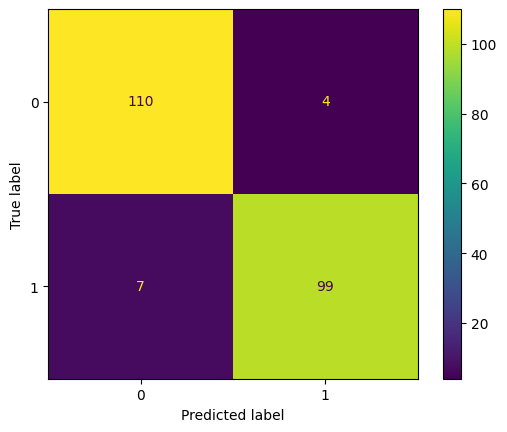

In [221]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [222]:
ensemble_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", ensemble_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       114
           1       0.96      0.93      0.95       106

    accuracy                           0.95       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220

